In [7]:
ls

NewMultipleVarModel.ipynb  NewPozaTVNModel.ipynb


In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
import matplotlib.pyplot as plt

In [9]:
pozas_df = pd.read_csv("../inputs/tvn_a_cocina_historico.csv")
pozas_df.head()

,PLANTA,FECHA P.,HORA,TDC REAL,TVN COCINA
0,ATICO,2019-11-06,1899-12-30 23:00:00,15.0,30.1
1,ATICO,2019-11-06,1899-12-31 00:00:00,16.0,24.6
2,ATICO,2019-11-06,1899-12-31 01:00:00,17.0,25.9
3,ATICO,2019-11-06,1899-12-31 02:00:00,18.0,28.5
4,ATICO,2019-11-06,1899-12-31 03:00:00,19.0,26.8


In [10]:
pozas_df.describe()

,TDC REAL,TVN COCINA
count,9873.000000,9873.000000
mean,25.072197,32.860255
std,9.601283,10.700183
min,5.000000,16.900000
25%,18.000000,25.600000
50%,24.300000,30.300000
75%,30.500000,37.700000
max,61.000000,107.100000


In [11]:
pozas_df = pozas_df[(pozas_df['TDC REAL'] > 6) & (pozas_df['TDC REAL'] < 39)]
pozas_df = pozas_df[(pozas_df['TVN COCINA'] < 75)]
pozas_df.describe()

,TDC REAL,TVN COCINA
count,9027.000000,9027.000000
mean,23.221834,32.498006
std,7.465729,9.447760
min,7.000000,16.900000
25%,17.000000,25.600000
50%,23.300000,30.400000
75%,29.000000,37.700000
max,38.700000,74.800000


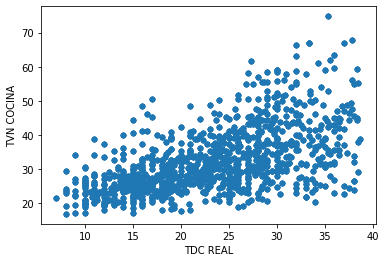

In [12]:
pozas_df.plot.scatter(x='TDC REAL', y='TVN COCINA')

In [13]:
## Setting model features
baseline_feature = ['TDC REAL']
X_features = ['TDC REAL']
#X_features = ['TDC REAL', 'PLANTA']
y_feature = 'TVN COCINA'

polynomial_features= PolynomialFeatures(degree=2)
model = LinearRegression(normalize=True)
#model_xgb = xgb.XGBRegressor(n_estimators=5, learning_rate=0.5)

In [32]:
y_tradicional = pozas_df[y_feature]
X_tradicional = pozas_df[baseline_feature]
y_baseline = X_tradicional * 1.4
error_baseline_tradicional = mean_absolute_error(y_tradicional, y_baseline)
print('error_baseline_tradicional', error_baseline_tradicional)

error_baseline_tradicional 7.2195413758723825


In [15]:
#pd.get_dummies(pozas_df, prefix=['PLANTA'], columns=['PLANTA'])

In [16]:
X_df = pozas_df[X_features]
#x_poly = polynomial_features.fit_transform(X_df)
#X_df = pd.get_dummies(X_df, prefix=['PLANTA'], columns=['PLANTA'])

y_df = pozas_df[y_feature]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=9)

In [18]:
model.fit(X_train, y_train)
tvn_predictions = model.predict(X_test)
model_mean_error = mean_absolute_error(y_test, tvn_predictions)
print('model_mean_error', model_mean_error)

model_mean_error 6.00555684606101


In [19]:
print(model.coef_)
print(model.intercept_)

[0.73430132]
15.464563432986846
